# 0.0 IMPORTS

In [1]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../../projeto/src')
from utils import utils
my_utils = utils.Utils()
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import precision_recall_curve

## 0.1 Data Load

In [2]:
config_file = my_utils.load_config_file('../../config/config.yaml')
columns_to_use = config_file['columns_to_use_2']


In [3]:
df_raw = pd.read_parquet('../../projeto/data/featured/data_featured.parquet', columns=columns_to_use)

In [4]:
df_raw.head()

,SK_ID_CURR,TARGET,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,CC_LIMIT_USAGE,FRAC_PAID_INSTALLMENTS,AMT_CREDIT,ACCEPTED_CREDICT_PA,...,AMT_GOODS_PRICE,AVG_AMOUNT_ANNUITY_PA,DAYS_BIRTH,FUTURE_INSTALLMENTS_POS,OWN_CAR_AGE,DAYS_TO_END_B,DAYS_EMPLOYED,OCCUPATION_TYPE,DPD_INSTALLMENTS,CODE_GENDER
0,100002,1,Business Entity Type 3,0.083037,0.139376,0.262949,NaN,1.000000,406597.5,1.000000,...,351000.0,9251.775,-9461,24.0,NaN,62.0,-637,Laborers,-20.421053,M
1,100003,0,School,0.311267,NaN,0.622246,NaN,1.000000,1293502.5,0.949329,...,1129500.0,56553.990,-16765,6.0,NaN,1216.0,-1188,Core staff,-7.160000,F
2,100004,0,Government,NaN,0.729567,0.555912,NaN,1.000000,135000.0,1.207699,...,135000.0,5357.250,-19046,4.0,26.0,-382.0,-225,Laborers,-7.666667,M
3,100006,0,Business Entity Type 3,NaN,NaN,0.650442,0.0,1.000000,312682.5,1.010763,...,297000.0,23651.175,-19005,12.0,NaN,NaN,-3039,Laborers,-19.375000,F
4,100007,0,Religion,NaN,NaN,0.322738,NaN,0.954545,513000.0,0.969650,...,513000.0,12278.805,-19932,12.0,NaN,-783.0,-3038,Core staff,-3.636364,M


# 1.0 DATA DESCRIPTION

In [169]:
df1 = df_raw.copy()

## 1.1 Data Description

In [7]:
# Print Data Shape
print(f'Data Shape: {df1.shape}')
print('------------------------------------ \n')

# Print Data Types
print(f'Data Types:')
display(df1.dtypes)
print('------------------------------------ \n')

# Print Data Head
print(f'Data Head:')
display(df1.head())
print('------------------------------------ \n')

# Print Data NaNs Percentage
print(f'Data NaNs:')
display(df1.isna().mean().sort_values(ascending=False))
print('------------------------------------ \n')

# Print Data Describe   
print(f'Data Describe:')
display(df1.describe().T)
print('------------------------------------ \n')

Data Shape: (307511, 22)
------------------------------------ 

Data Types:


SK_ID_CURR                   int64
TARGET                       int64
ORGANIZATION_TYPE           object
EXT_SOURCE_1               float64
EXT_SOURCE_3               float64
EXT_SOURCE_2               float64
CC_LIMIT_USAGE             float64
FRAC_PAID_INSTALLMENTS     float64
AMT_CREDIT                 float64
ACCEPTED_CREDICT_PA        float64
AMT_ANNUITY                float64
SK_PREV_POS                float64
AMT_GOODS_PRICE            float64
AVG_AMOUNT_ANNUITY_PA      float64
DAYS_BIRTH                   int64
FUTURE_INSTALLMENTS_POS    float64
OWN_CAR_AGE                float64
DAYS_TO_END_B              float64
DAYS_EMPLOYED                int64
OCCUPATION_TYPE             object
DPD_INSTALLMENTS           float64
CODE_GENDER                 object
dtype: object

------------------------------------ 

Data Head:


,SK_ID_CURR,TARGET,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_3,EXT_SOURCE_2,CC_LIMIT_USAGE,FRAC_PAID_INSTALLMENTS,AMT_CREDIT,ACCEPTED_CREDICT_PA,...,AMT_GOODS_PRICE,AVG_AMOUNT_ANNUITY_PA,DAYS_BIRTH,FUTURE_INSTALLMENTS_POS,OWN_CAR_AGE,DAYS_TO_END_B,DAYS_EMPLOYED,OCCUPATION_TYPE,DPD_INSTALLMENTS,CODE_GENDER
0,100002,1,Business Entity Type 3,0.083037,0.139376,0.262949,NaN,1.000000,406597.5,1.000000,...,351000.0,9251.775,-9461,24.0,NaN,62.0,-637,Laborers,-20.421053,M
1,100003,0,School,0.311267,NaN,0.622246,NaN,1.000000,1293502.5,0.949329,...,1129500.0,56553.990,-16765,6.0,NaN,1216.0,-1188,Core staff,-7.160000,F
2,100004,0,Government,NaN,0.729567,0.555912,NaN,1.000000,135000.0,1.207699,...,135000.0,5357.250,-19046,4.0,26.0,-382.0,-225,Laborers,-7.666667,M
3,100006,0,Business Entity Type 3,NaN,NaN,0.650442,0.0,1.000000,312682.5,1.010763,...,297000.0,23651.175,-19005,12.0,NaN,NaN,-3039,Laborers,-19.375000,F
4,100007,0,Religion,NaN,NaN,0.322738,NaN,0.954545,513000.0,0.969650,...,513000.0,12278.805,-19932,12.0,NaN,-783.0,-3038,Core staff,-3.636364,M


------------------------------------ 

Data NaNs:


CC_LIMIT_USAGE             0.720218
OWN_CAR_AGE                0.659908
EXT_SOURCE_1               0.563811
OCCUPATION_TYPE            0.313455
EXT_SOURCE_3               0.198253
DAYS_TO_END_B              0.150463
FUTURE_INSTALLMENTS_POS    0.058830
SK_PREV_POS                0.058752
AVG_AMOUNT_ANNUITY_PA      0.054863
ACCEPTED_CREDICT_PA        0.054245
FRAC_PAID_INSTALLMENTS     0.051637
DPD_INSTALLMENTS           0.051627
EXT_SOURCE_2               0.002146
AMT_GOODS_PRICE            0.000904
AMT_ANNUITY                0.000039
DAYS_EMPLOYED              0.000000
SK_ID_CURR                 0.000000
DAYS_BIRTH                 0.000000
TARGET                     0.000000
AMT_CREDIT                 0.000000
ORGANIZATION_TYPE          0.000000
CODE_GENDER                0.000000
dtype: float64

------------------------------------ 

Data Describe:


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,1.000020e+05,189145.500000,278202.000000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
EXT_SOURCE_1,134133.0,0.502130,0.211062,1.456813e-02,0.334007,0.505998,0.675053,9.626928e-01
EXT_SOURCE_3,246546.0,0.510853,0.194844,5.272652e-04,0.370650,0.535276,0.669057,8.960095e-01
EXT_SOURCE_2,306851.0,0.514393,0.191060,8.173617e-08,0.392457,0.565961,0.663617,8.549997e-01
CC_LIMIT_USAGE,86036.0,0.326981,0.325396,-8.484848e-02,0.000000,0.253387,0.592000,2.138790e+00
FRAC_PAID_INSTALLMENTS,291632.0,1.382975,30.178966,3.333333e-01,0.953846,1.000000,1.000000,8.482446e+03
AMT_CREDIT,307511.0,599025.999706,402490.776996,4.500000e+04,270000.000000,513531.000000,808650.000000,4.050000e+06
ACCEPTED_CREDICT_PA,290830.0,0.968752,0.170634,0.000000e+00,0.907193,0.971511,1.026570,5.467110e+00
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1.615500e+03,16524.000000,24903.000000,34596.000000,2.580255e+05


------------------------------------ 



<Axes: ylabel='OWN_CAR_AGE'>

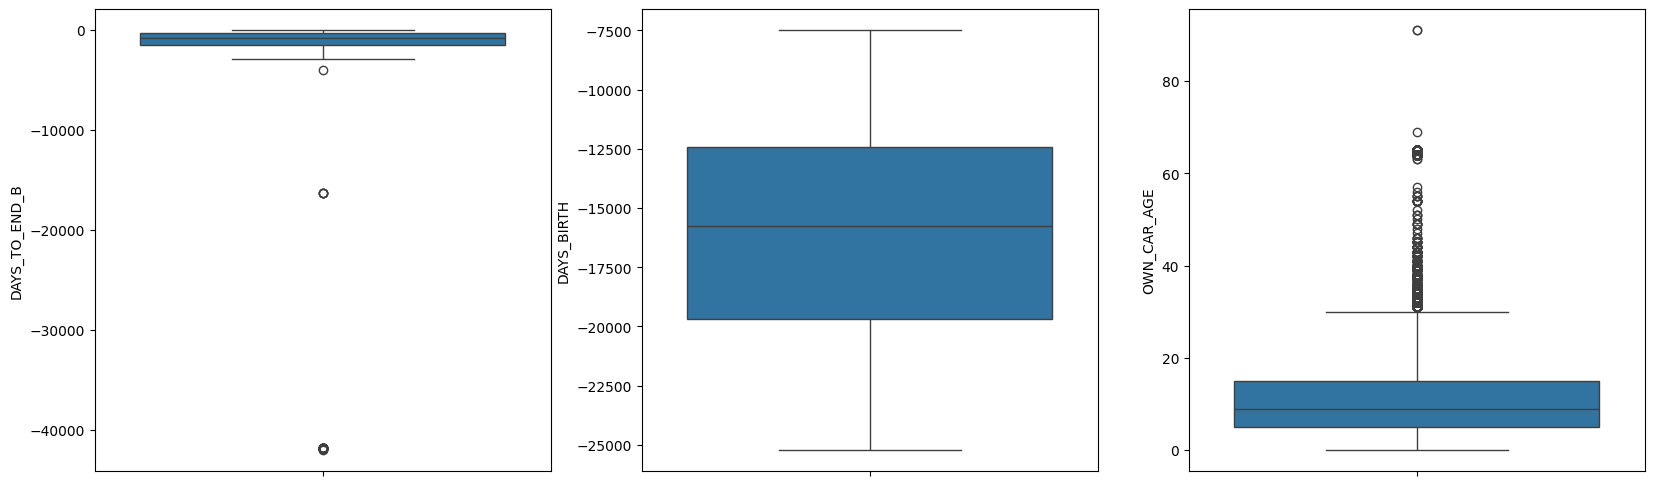

In [293]:
plt.figure(figsize=(20,6))
plt.subplot(1,3,1)
sns.boxplot(df1[df1['DAYS_TO_END_B'] < 0]['DAYS_TO_END_B'])

plt.subplot(1,3,2)
sns.boxplot(df1['DAYS_BIRTH'])

plt.subplot(1,3,3)
sns.boxplot(df1['OWN_CAR_AGE'])

- 8% of the dataset is 1 targeted. This shows an unbalaced dataset
- 56% of EXT_SOURCE_1 feature is **NaN values**
- 65% of OWN_CAR_AGE feature is **NaN values**
- 75% of CC_LIMIT_USAGE if **NaN values**


## 1.1 Handling Missing Data

In [171]:
def fillout_nan(dataset):

    df = dataset.copy()

    # DPD_INSTALLMENTS -> It will be considered that these clients don't have previous installments. So it's filled with 0
    df['DPD_INSTALLMENTS'] = df['DPD_INSTALLMENTS'].fillna(0)

    # FRAC_PAID_INSTALLMENTS -> It will be considered that these clients don't have previous installments. So it's filled with the average
    df['FRAC_PAID_INSTALLMENTS'] = df['FRAC_PAID_INSTALLMENTS'].fillna(df['FRAC_PAID_INSTALLMENTS'].mean())

    # AMT_GOODS_PRICE -> It will be considered that these clients are asking for a loan with no specific goal. So it's filled with 0
    df['AMT_GOODS_PRICE'] = df['AMT_GOODS_PRICE'].fillna(0)

    # ACCEPTED_CREDICT_PA
    df['ACCEPTED_CREDICT_PA'] = df.apply(lambda x: x['AMT_CREDIT']/x['AMT_GOODS_PRICE'] if x['AMT_GOODS_PRICE'] != 0 and np.isnan(x['ACCEPTED_CREDICT_PA']) else 
                                                    1 if x['AMT_GOODS_PRICE'] == 0 else
                                                    x['ACCEPTED_CREDICT_PA'], axis = 1)

    # AMT_ANNUITY
    df['AMT_ANNUITY'] = df['AMT_ANNUITY'].fillna(0)

    # AVG_AMOUNT_ANNUITY_PA
    df['AVG_AMOUNT_ANNUITY_PA'] = df['AVG_AMOUNT_ANNUITY_PA'].fillna(df['AMT_ANNUITY'])

    # SK_PREV_POS -> Clients don't have previous application for POS
    df['SK_PREV_POS'] = df['SK_PREV_POS'].fillna(0)

    # * DAYS_TO_END_B -> Clients don't have any opened bureau credit. Since this feature has high impact, a flag columns will be created
    df['DAYS_TO_END_B_NAN'] = df['DAYS_TO_END_B'].apply(lambda x: 1 if x == np.nan else 0)
    df['DAYS_TO_END_B'] = df['DAYS_TO_END_B'].fillna(-20000)

    # KNN Imputer
    iter_imputer = IterativeImputer(random_state=0)
    df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']] = iter_imputer.fit_transform(df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']])

    ######
    # OWN CAR AGE -> Clients don't have a car
    df['OWN_CAR_AGE'] = df['OWN_CAR_AGE'].fillna(-1) # -1 will be used to represent that the client doesn't have a car

    # CC_BALANCE -> Clients don't have a credit card
    df['CC_LIMIT_USAGE'] = df['CC_LIMIT_USAGE'].fillna(-1)
    
    # OCCUPATION TYPE
    df['OCCUPATION_TYPE'] = df['OCCUPATION_TYPE'].fillna('Unknown')

    # FUTURE POS 
    df['FUTURE_INSTALLMENTS_POS'] = df['FUTURE_INSTALLMENTS_POS'].fillna(0)

    # df.dropna(inplace = True)

    return df

In [172]:
df1 = fillout_nan(df1)

In [173]:
df1.isna().sum()

SK_ID_CURR                 0
TARGET                     0
ORGANIZATION_TYPE          0
EXT_SOURCE_1               0
EXT_SOURCE_3               0
EXT_SOURCE_2               0
CC_LIMIT_USAGE             0
FRAC_PAID_INSTALLMENTS     0
AMT_CREDIT                 0
ACCEPTED_CREDICT_PA        0
AMT_ANNUITY                0
SK_PREV_POS                0
AMT_GOODS_PRICE            0
AVG_AMOUNT_ANNUITY_PA      0
DAYS_BIRTH                 0
FUTURE_INSTALLMENTS_POS    0
OWN_CAR_AGE                0
DAYS_TO_END_B              0
DAYS_EMPLOYED              0
OCCUPATION_TYPE            0
DPD_INSTALLMENTS           0
CODE_GENDER                0
DAYS_TO_END_B_NAN          0
dtype: int64

# 2.0 FEATURE ENGINEERING

In [11]:
pd.set_option('display.max_colwidth', None)
df_features_description = pd.read_csv('../../projeto/data/raw/HomeCredit_columns_description.csv', encoding='latin1', index_col = 0) 
df_features_description = df_features_description[df_features_description['Table'] == 'application_{train|test}.csv']

In [12]:
cols = []
other_cols = []
for col in columns_to_use:
    if col in df_features_description.Row.tolist():
        cols.append(col)
    if col not in df_features_description.Row.tolist():
        other_cols.append(col)

df_features_description = df_features_description[df_features_description.Row.isin(cols)]
display(df_features_description)
#print(other_cols)

,Table,Row,Description,Special
1,application_{train|test}.csv,SK_ID_CURR,ID of loan in our sample,NaN
2,application_{train|test}.csv,TARGET,"Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)",NaN
6,application_{train|test}.csv,CODE_GENDER,Gender of the client,NaN
11,application_{train|test}.csv,AMT_CREDIT,Credit amount of the loan,NaN
12,application_{train|test}.csv,AMT_ANNUITY,Loan annuity,NaN
13,application_{train|test}.csv,AMT_GOODS_PRICE,For consumer loans it is the price of the goods for which the loan is given,NaN
20,application_{train|test}.csv,DAYS_BIRTH,Client's age in days at the time of application,time only relative to the application
21,application_{train|test}.csv,DAYS_EMPLOYED,How many days before the application the person started current employment,time only relative to the application
24,application_{train|test}.csv,OWN_CAR_AGE,Age of client's car,NaN
31,application_{train|test}.csv,OCCUPATION_TYPE,What kind of occupation does the client have,NaN


In [14]:
df1['ORGANIZATION_TYPE'].unique()

array(['Business Entity Type 3', 'School', 'Government', 'Religion',
       'Other', 'XNA', 'Electricity', 'Medicine',
       'Business Entity Type 2', 'Self-employed', 'Transport: type 2',
       'Construction', 'Housing', 'Kindergarten', 'Trade: type 7',
       'Industry: type 11', 'Military', 'Services', 'Security Ministries',
       'Transport: type 4', 'Industry: type 1', 'Emergency', 'Security',
       'Trade: type 2', 'University', 'Transport: type 3', 'Police',
       'Business Entity Type 1', 'Postal', 'Industry: type 4',
       'Agriculture', 'Restaurant', 'Culture', 'Hotel',
       'Industry: type 7', 'Trade: type 3', 'Industry: type 3', 'Bank',
       'Industry: type 9', 'Insurance', 'Trade: type 6',
       'Industry: type 2', 'Transport: type 1', 'Industry: type 12',
       'Mobile', 'Trade: type 1', 'Industry: type 5', 'Industry: type 10',
       'Legal Services', 'Advertising', 'Trade: type 5', 'Cleaning',
       'Industry: type 13', 'Trade: type 4', 'Telecom',
       'I

In [15]:
def categorize_by_keyword(org_type):
    if 'Industry' in org_type:
        return 'Industry and Manufacturing'
    elif 'Trade' in org_type:
        return 'Trade and Retail'
    elif 'Transport' in org_type:
        return 'Transportation'
    elif 'School' in org_type or 'University' in org_type or 'Kindergarten' in org_type:
        return 'Education'
    elif 'Hospital' in org_type or 'Medicine' in org_type:
        return 'Health and Social Services'
    elif 'Electricity' in org_type or 'Telecom' in org_type:
        return 'Utilities and Infrastructure'
    elif 'Business Entity' in org_type or 'Legal' in org_type or 'Advertising' in org_type:
        return 'Business and Legal Services'
    elif 'Government' in org_type or 'Military' in org_type or 'Police' in org_type or 'Security' in org_type:
        return 'Government and Public Services'
    else:
        return 'Other'

In [133]:
def feature_engineering(dataset):

    df_feature = dataset.copy()
    # Age
    df_feature['AGE'] = round(df_feature['DAYS_BIRTH'] / -365, 0)
    # Months Employed
    df_feature['MONTHS_EMPLOYED'] = df_feature['DAYS_EMPLOYED'] / -30

    # Categorize Organization Type
    # Applying the function to the dataframe
    df_feature['CATEGORY'] = df_feature['ORGANIZATION_TYPE'].apply(categorize_by_keyword)

    df_feature.drop(columns = ['DAYS_BIRTH', 'DAYS_EMPLOYED', 'ORGANIZATION_TYPE'], inplace = True)

    return df_feature

In [137]:
df2 = feature_engineering(df1)

# 3.0 EDA

## 3.1 Univariate Analysis

In [19]:
# Target Distribution
print('Target Distribution:')
display(df2.TARGET.value_counts(normalize=True))

Target Distribution:


TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64

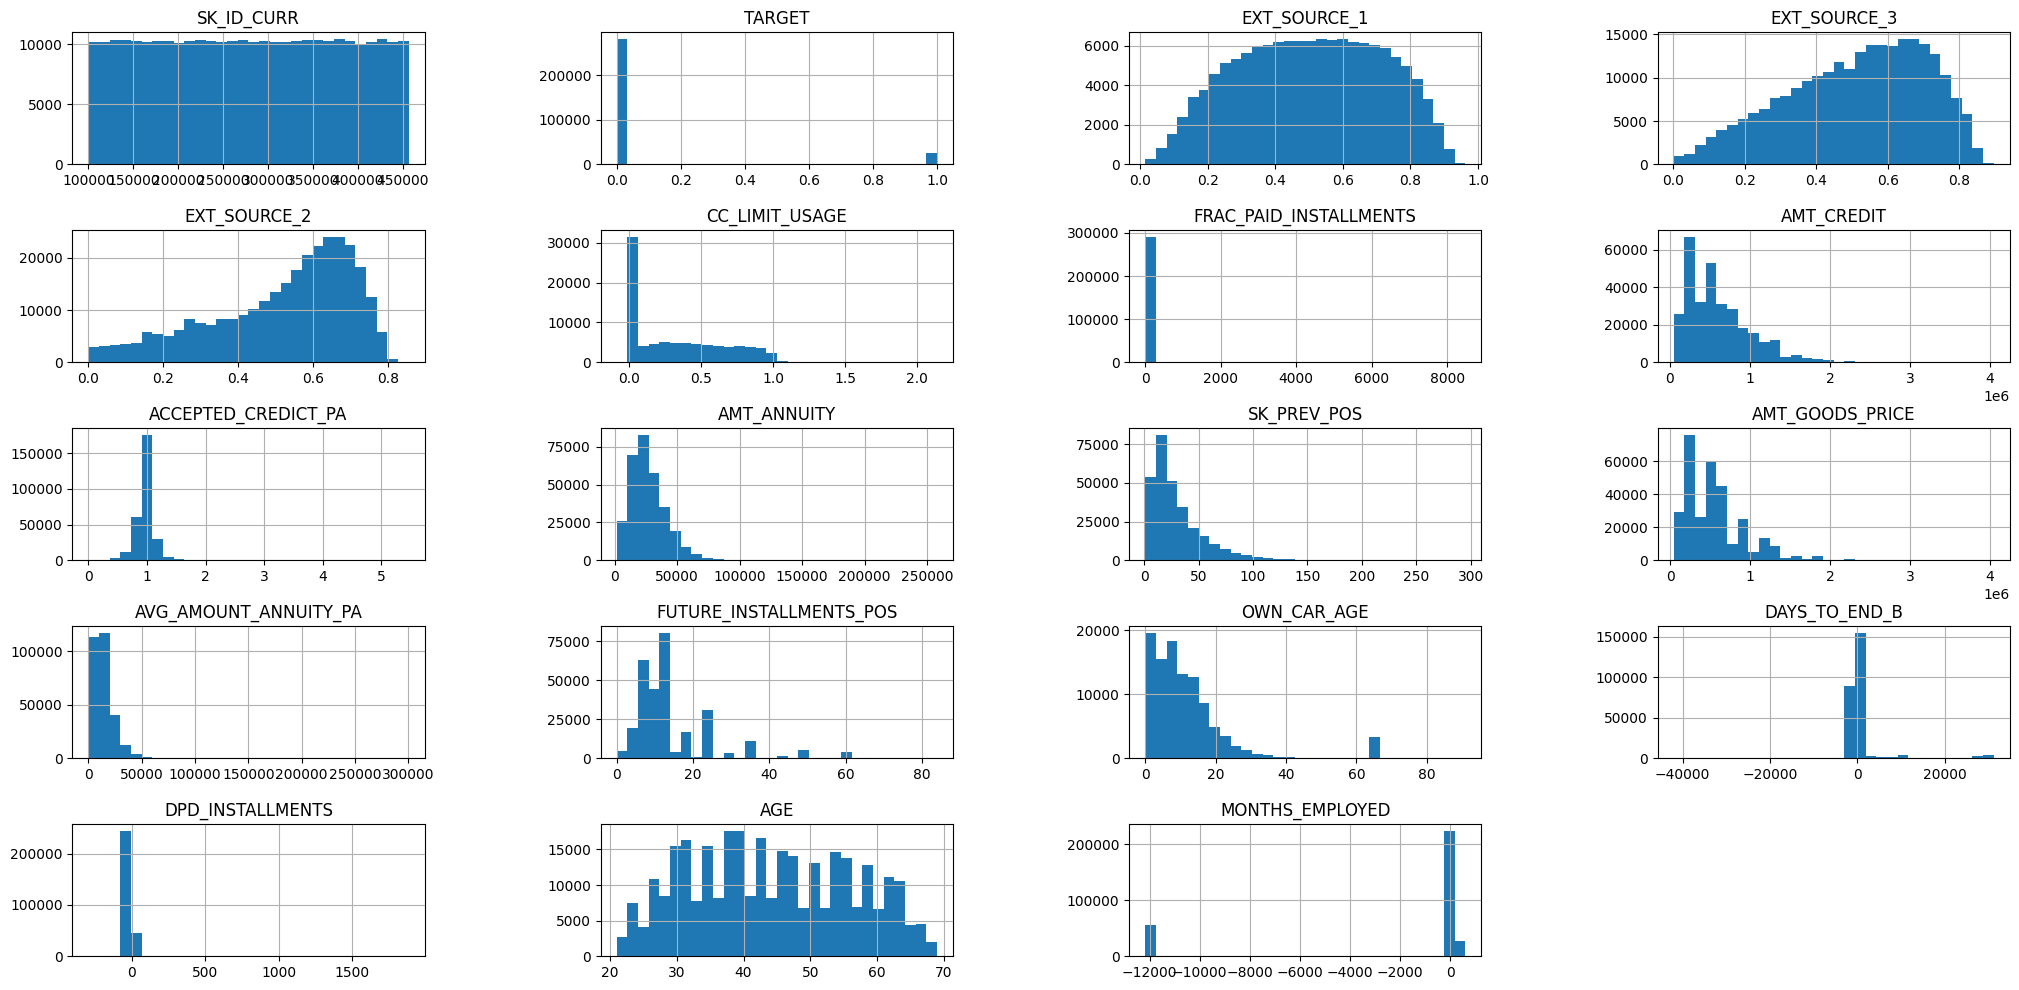

In [20]:
# Numerical Variable
num_attributes = df2.select_dtypes(include=['int64', 'float64'])

ax = num_attributes.hist(bins=30, figsize = (25,12));
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

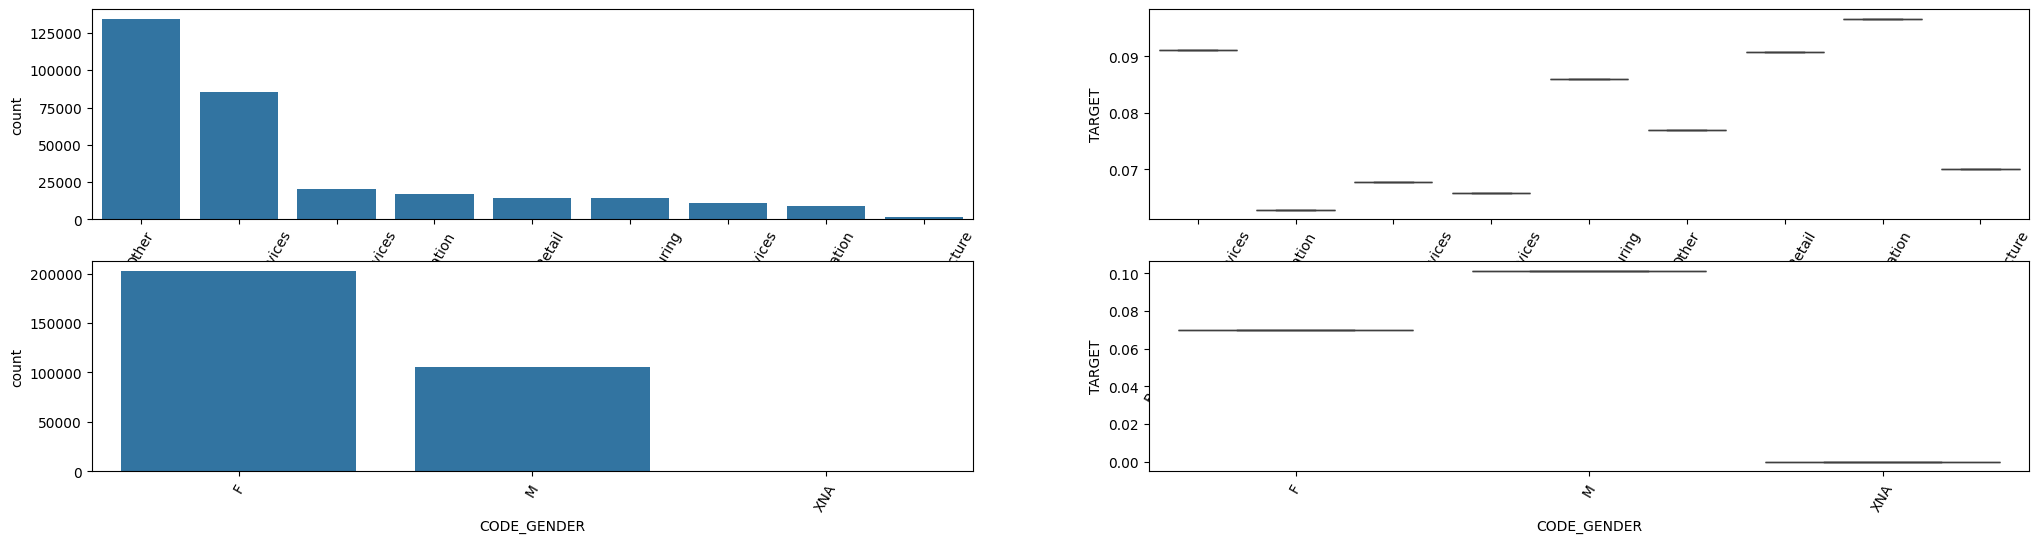

In [135]:
# Categorical Variable
cat_attributes = df2.select_dtypes(exclude=['int64', 'float64'])

plt.figure(figsize=(25,6))

# Category counts
plt.subplot(2,2,1)

sns.countplot(data = cat_attributes,x = 'CATEGORY', order = cat_attributes['CATEGORY'].value_counts().index)
plt.xticks(rotation=60);

# box plot with target
plt.subplot(2,2,2)
aux = df2.groupby('CATEGORY')['TARGET'].mean().reset_index()
sns.boxplot(data = aux, x = 'CATEGORY', y = 'TARGET')
plt.xticks(rotation=60);

# Category counts
plt.subplot(2,2,3)

sns.countplot(data = cat_attributes,x = 'CODE_GENDER', order = cat_attributes['CODE_GENDER'].value_counts().index)
plt.xticks(rotation=60);

# box plot with target
plt.subplot(2,2,4)
aux = df2.groupby('CODE_GENDER')['TARGET'].mean().reset_index()
sns.boxplot(data = aux, x = 'CODE_GENDER', y = 'TARGET')
plt.xticks(rotation=60);

## 3.2 Bivariate Analysis

## 3.3 Multivariate analysis

### 3.3.1 Numerical Variables

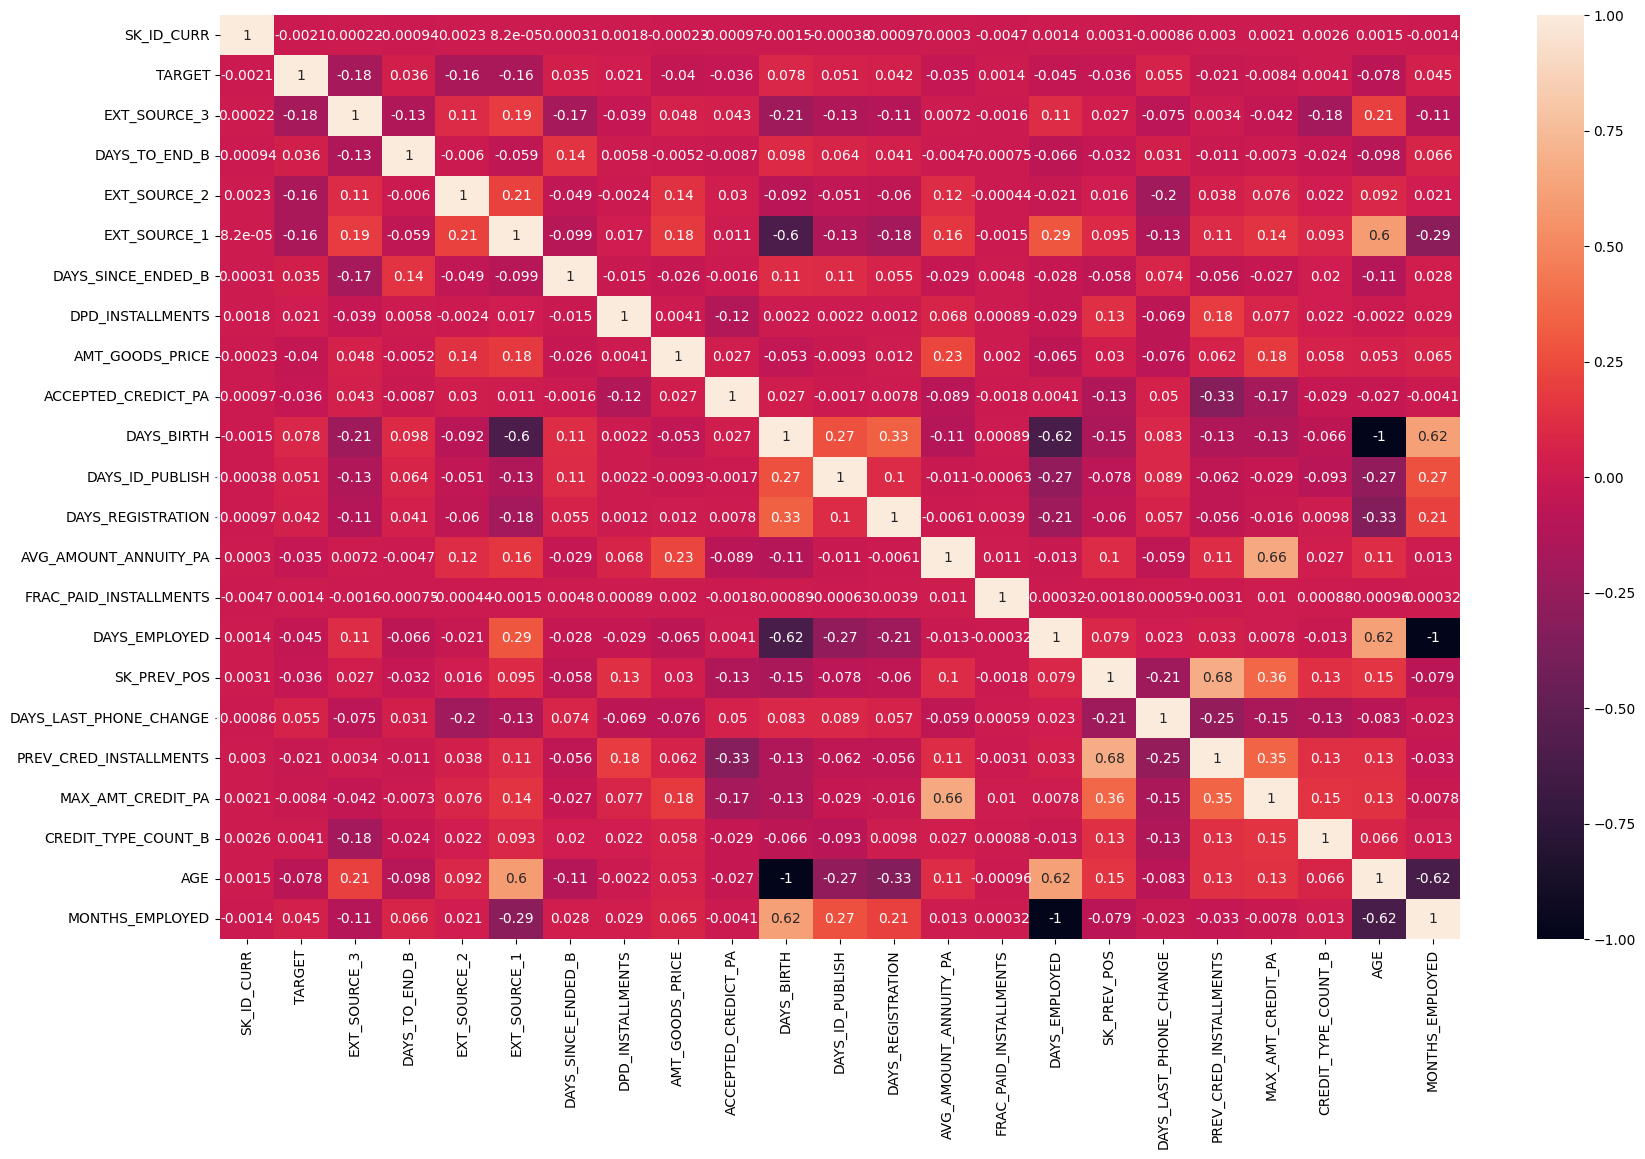

In [17]:
correlation = num_attributes.corr(method='pearson')

plt.figure(figsize=(20,12))
sns.heatmap(correlation, annot=True);

# 4.0 DATA FILTERING

In [27]:
from imblearn.under_sampling import RandomUnderSampler

In [138]:
df4 = df2.copy()

In [90]:
def splitting_data(dataset):

    df = dataset.copy()

    # filtering age
    df = df[(df['AGE'] < 80) & (df['AGE'] > 18)]

    # months empoloyed 
    df = df[df['MONTHS_EMPLOYED'] > -2500]

    X = df.drop(columns=['TARGET','SK_ID_CURR'])
    y = df['TARGET']

    # Splitting into training and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Undersampling
    under_sampler = RandomUnderSampler(random_state=42,sampling_strategy=0.5)
    X_train, y_train = under_sampler.fit_resample(X_train, y_train)

    return X_train, X_test, y_train, y_test

In [151]:
X_train, X_test, y_train, y_test = splitting_data(df4)

In [140]:
y_train.value_counts(normalize=True)

TARGET
0    0.666667
1    0.333333
Name: proportion, dtype: float64

# 5.0 DATA PREPROCESSING

In [34]:
import category_encoders as ce
from sklearn.preprocessing import RobustScaler

In [141]:
X_train.dtypes

EXT_SOURCE_1               float64
EXT_SOURCE_3               float64
EXT_SOURCE_2               float64
CC_LIMIT_USAGE             float64
FRAC_PAID_INSTALLMENTS     float64
AMT_CREDIT                 float64
ACCEPTED_CREDICT_PA        float64
AMT_ANNUITY                float64
SK_PREV_POS                float64
AMT_GOODS_PRICE            float64
AVG_AMOUNT_ANNUITY_PA      float64
FUTURE_INSTALLMENTS_POS    float64
OWN_CAR_AGE                float64
DAYS_TO_END_B              float64
OCCUPATION_TYPE             object
DPD_INSTALLMENTS           float64
CODE_GENDER                 object
DAYS_TO_END_B_NAN            int64
EXT_SOURCE_1_NAN             int64
EXT_SOURCE_2_NAN             int64
EXT_SOURCE_3_NAN             int64
FLAG_OWN_CAR                object
FLAG_CC                     object
AGE                        float64
MONTHS_EMPLOYED            float64
CATEGORY                    object
dtype: object

In [152]:
def preprocess_data(X_test, X_train, y_train):

    X_test_processed = X_test.copy()
    X_train_processed = X_train.copy()

    # Target Encoding for ORGANIZATION_TYPE
    encoder = ce.TargetEncoder()
    # X_train_processed['ORGANIZATION_TYPE'] = encoder.fit_transform(X_train_processed['ORGANIZATION_TYPE'], y_train)
    # X_test_processed['ORGANIZATION_TYPE'] = encoder.transform(X_test_processed['ORGANIZATION_TYPE'])

    # Target Encoding for CATEGORY
    X_train_processed['CATEGORY'] = encoder.fit_transform(X_train_processed['CATEGORY'], y_train)
    X_test_processed['CATEGORY'] = encoder.transform(X_test_processed['CATEGORY'])

    X_train_processed['OCCUPATION_TYPE'] = encoder.fit_transform(X_train_processed['OCCUPATION_TYPE'], y_train)
    X_test_processed['OCCUPATION_TYPE'] = encoder.transform(X_test_processed['OCCUPATION_TYPE'])

    # One Hot Encoding for GENDER CODE
    train_dummies_cg = pd.get_dummies(X_train_processed['CODE_GENDER'])
    test_dummies_cg = pd.get_dummies(X_test_processed['CODE_GENDER'])
    # One Hot Encoding for FLAG_OWN_CAR
    train_dummies_oc = pd.get_dummies(X_train_processed['FLAG_OWN_CAR'], prefix = 'FLAG_OWN_CAR')
    test_dummies_oc = pd.get_dummies(X_test_processed['FLAG_OWN_CAR'], prefix = 'FLAG_OWN_CAR')
    # One Hot Encoding for FLAG_CC
    train_dummies_cc = pd.get_dummies(X_train_processed['FLAG_CC'], prefix = 'FLAG_CC')
    test_dummies_cc = pd.get_dummies(X_test_processed['FLAG_CC'], prefix = 'FLAG_CC')

    X_train_processed = pd.concat([X_train_processed, train_dummies_cg, train_dummies_oc, train_dummies_cc], axis = 1).drop(columns = ['CODE_GENDER','XNA','FLAG_OWN_CAR','FLAG_CC'])
    X_test_processed = pd.concat([X_test_processed, test_dummies_cg, test_dummies_oc, test_dummies_cc], axis = 1).drop(columns = ['CODE_GENDER','XNA','FLAG_OWN_CAR','FLAG_CC'])    

    # Apply Robust Scaler for all numerical variables
    scaler = RobustScaler()

    num_attributes = X_test.select_dtypes(include=['int64', 'float64'])
    num_attributes = num_attributes.drop(columns = ['AGE','DAYS_TO_END_B','OWN_CAR_AGE'])

    # X_train_processed[num_attributes.columns] = scaler.fit_transform(X_train_processed[num_attributes.columns])  
    # X_test_processed[num_attributes.columns] = scaler.transform(X_test_processed[num_attributes.columns])


    return X_test_processed, X_train_processed

In [153]:
X_test, X_train = preprocess_data(X_test, X_train, y_train)

# 6.0 FEATURE SELECTION

# 7.0 MODEL

Due NaN values, sample size and number of features. The following models will be considered in a first moment:

- Logistic Regressor
- RandomForest
- Light GBM

In [44]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix

## 7.1 LightGBM

In [45]:
import lightgbm
import scikitplot as skplt
from sklearn.model_selection import cross_val_score, GridSearchCV

In [241]:
lgb = lightgbm.LGBMClassifier(n_estimators=50, class_weight={1:2}, random_state=42, verbose = -1)
                              
lgb.fit(X_train, y_train)
y_proba_lgbm = lgb.predict_proba(X_test)
y_pred_lgbm = np.where(y_proba_lgbm[:, 1] > 0.5, 1, 0)

In [242]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.96      0.70      0.81     46061
           1       0.18      0.70      0.29      4367

    accuracy                           0.70     50428
   macro avg       0.57      0.70      0.55     50428
weighted avg       0.89      0.70      0.76     50428



c:\Users\diego\Desktop\Data Science\loan_risk_prediction\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

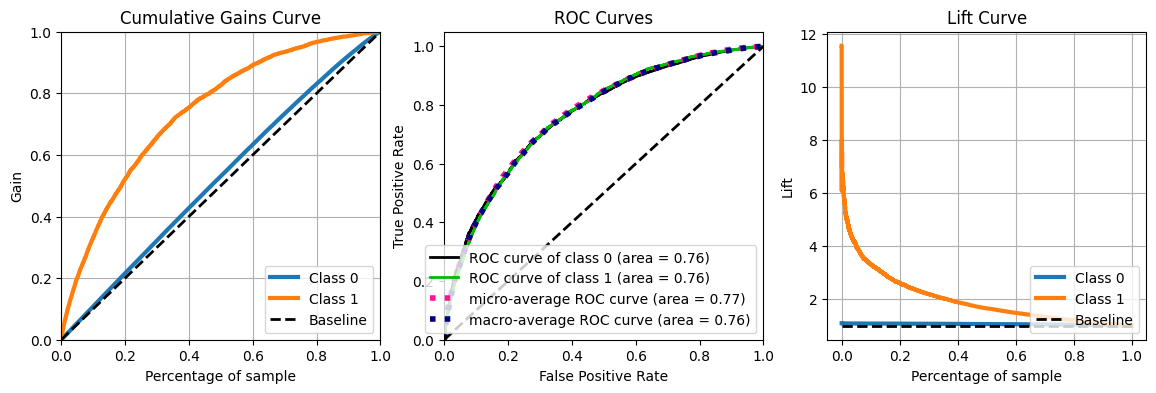

In [243]:
plt.figure(figsize = (14,4))

ax1 = plt.subplot(1,3,1)
skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas = y_proba_lgbm, ax=ax1)
ax2 = plt.subplot(1,3,2)
skplt.metrics.plot_roc_curve(y_true=y_test, y_probas = y_proba_lgbm, ax=ax2)
ax3 = plt.subplot(1,3,3)
skplt.metrics.plot_lift_curve(y_true=y_test, y_probas = y_proba_lgbm, ax=ax3)



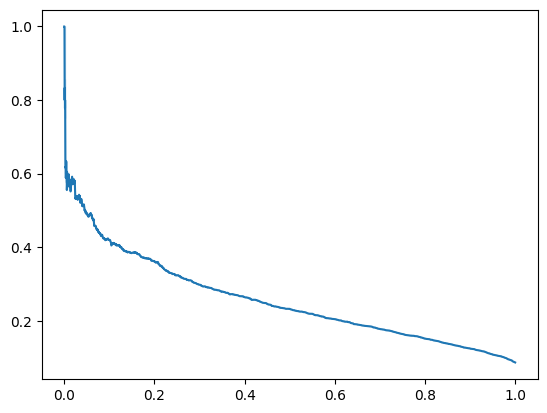

In [163]:
sns.lineplot(x=recall,y=precision);

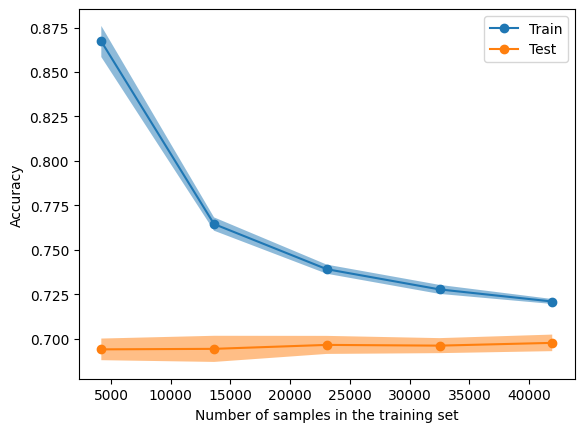

In [256]:
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1.0, 5, 100),
    "cv": ShuffleSplit(n_splits=6, test_size=0.2, random_state=42),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

precision, recall, thresholds = precision_recall_curve(y_test, y_proba_lgbm[:,1])
LearningCurveDisplay.from_estimator(lgb, **common_params)


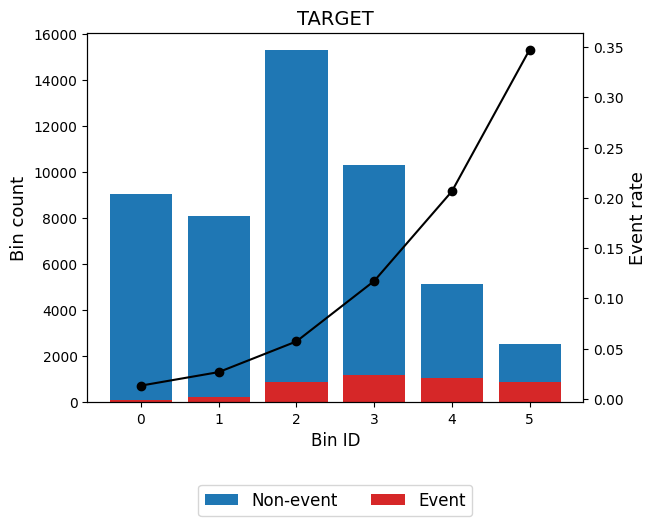

array([0.21315075, 0.29655994, 0.48278302, 0.65658846, 0.77433908])

In [258]:
from optbinning import OptimalBinning
optb = OptimalBinning(name='TARGET', dtype="numerical", solver="cp", max_n_bins=6)
optb.fit(y_proba_lgbm[:,1], y_test)
binning_table = optb.binning_table
binning_table.build()
binning_table.plot(metric="event_rate", add_special=False, add_missing=False)
optb.splits

## 7.2 Decision Tree Classifier

In [103]:
from sklearn.tree import DecisionTreeClassifier

In [189]:
dt = DecisionTreeClassifier(class_weight={0:1,1:1},random_state=42)
dt.fit(X_train, y_train)
y_proba_dt = dt.predict_proba(X_test)
y_pred_dt = dt.predict(X_test)

In [190]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.93      0.84      0.88     56537
           1       0.13      0.28      0.18      4965

    accuracy                           0.80     61502
   macro avg       0.53      0.56      0.53     61502
weighted avg       0.87      0.80      0.83     61502



c:\Users\diego\Desktop\Data Science\loan_risk_prediction\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

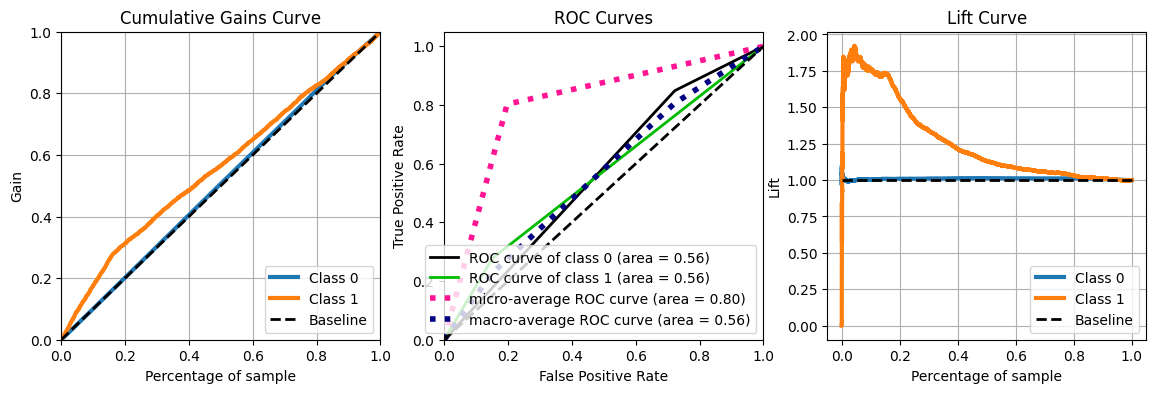

In [165]:
plt.figure(figsize = (14,4))

ax1 = plt.subplot(1,3,1)
skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas = y_proba_dt, ax=ax1)
ax2 = plt.subplot(1,3,2)
skplt.metrics.plot_roc_curve(y_true=y_test, y_probas = y_proba_dt, ax=ax2)
ax3 = plt.subplot(1,3,3)
skplt.metrics.plot_lift_curve(y_true=y_test, y_probas = y_proba_dt, ax=ax3)

## 7.3 Logistic Regression

In [199]:
from sklearn.linear_model import LogisticRegression

In [225]:
lr = LogisticRegression(class_weight={0:1,1:3})
lr.fit(X_train, y_train)
y_proba_lr = lr.predict_proba(X_test)
y_pred_lr = np.where(y_proba_lr[:, 1] > 0.83, 1, 0)

c:\Users\diego\Desktop\Data Science\loan_risk_prediction\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [223]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     46061
           1       0.02      0.00      0.00      4367

    accuracy                           0.91     50428
   macro avg       0.46      0.50      0.48     50428
weighted avg       0.84      0.91      0.87     50428



c:\Users\diego\Desktop\Data Science\loan_risk_prediction\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

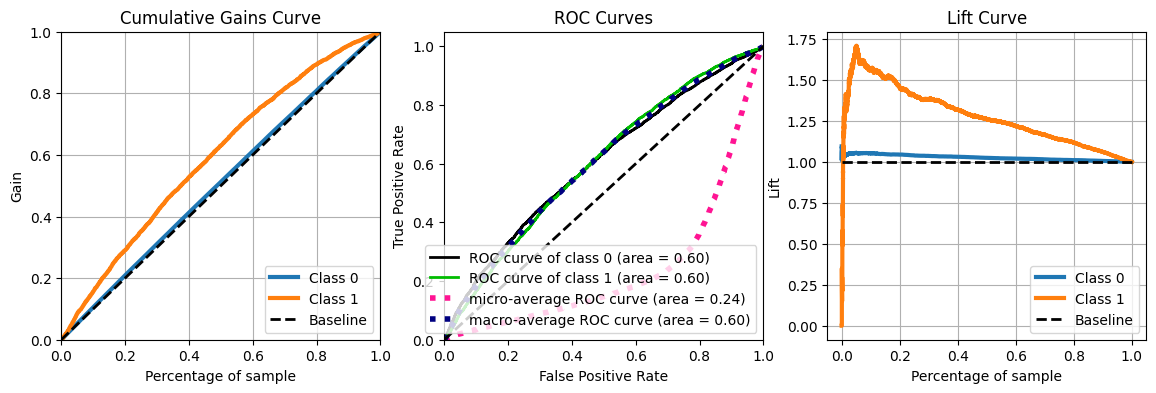

In [204]:
plt.figure(figsize = (14,4))

ax1 = plt.subplot(1,3,1)
skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas = y_proba_lr, ax=ax1)
ax2 = plt.subplot(1,3,2)
skplt.metrics.plot_roc_curve(y_true=y_test, y_probas = y_proba_lr, ax=ax2)
ax3 = plt.subplot(1,3,3)
skplt.metrics.plot_lift_curve(y_true=y_test, y_probas = y_proba_lr, ax=ax3)

## 7.4 Random Forest Classifier

In [205]:
from sklearn.ensemble import RandomForestClassifier

In [206]:
rf = RandomForestClassifier(n_estimators=100, class_weight={0:1,1:4}, random_state=42)
rf.fit(X_train, y_train)
y_proba_rf = rf.predict_proba(X_test)
y_pred_rf = rf.predict(X_test)

In [208]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92     46061
           1       0.26      0.34      0.29      4367

    accuracy                           0.86     50428
   macro avg       0.60      0.62      0.61     50428
weighted avg       0.88      0.86      0.87     50428



c:\Users\diego\Desktop\Data Science\loan_risk_prediction\.venv\Lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

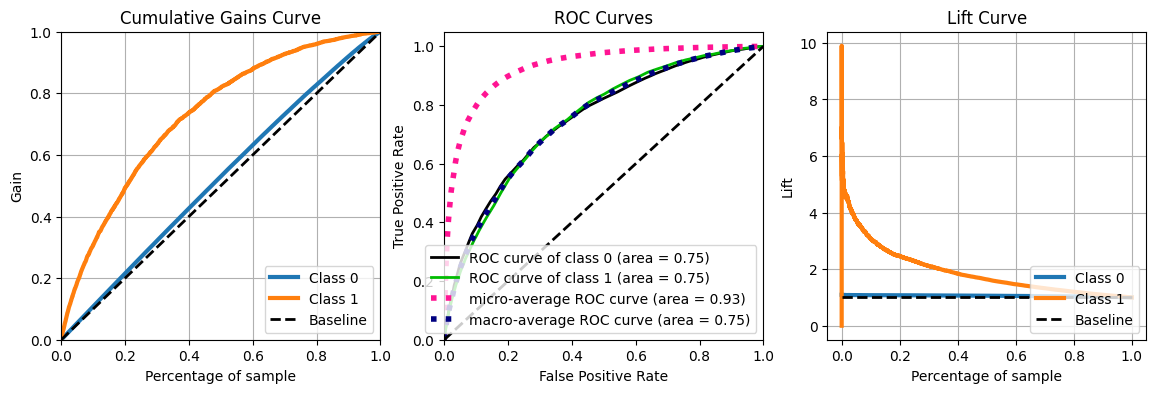

In [207]:
plt.figure(figsize = (14,4))

ax1 = plt.subplot(1,3,1)
skplt.metrics.plot_cumulative_gain(y_true=y_test, y_probas = y_proba_rf, ax=ax1)
ax2 = plt.subplot(1,3,2)
skplt.metrics.plot_roc_curve(y_true=y_test, y_probas = y_proba_rf, ax=ax2)
ax3 = plt.subplot(1,3,3)
skplt.metrics.plot_lift_curve(y_true=y_test, y_probas = y_proba_rf, ax=ax3)

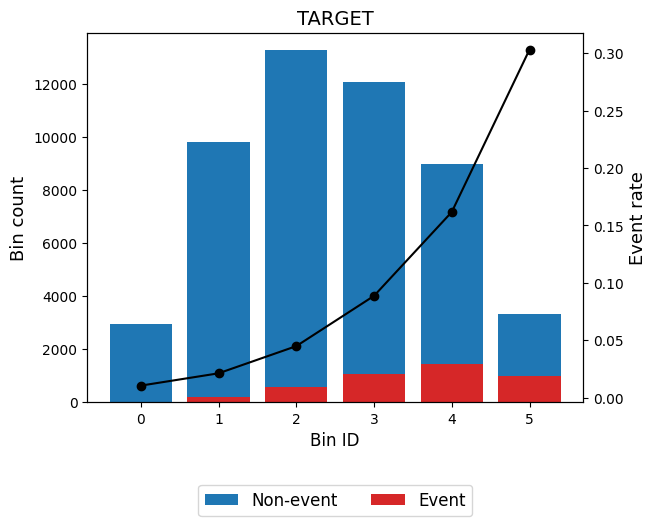

array([0.075     , 0.155     , 0.255     , 0.38499999, 0.57499999])

In [213]:
optb = OptimalBinning(name='TARGET', dtype="numerical", solver="cp", max_n_bins=6)
optb.fit(y_proba_rf[:,1], y_test)
binning_table = optb.binning_table
binning_table.build()
binning_table.plot(metric="event_rate", add_special=False, add_missing=False)
optb.splits

## 7.5 Feature Importance

<Axes: xlabel='importance', ylabel='name'>

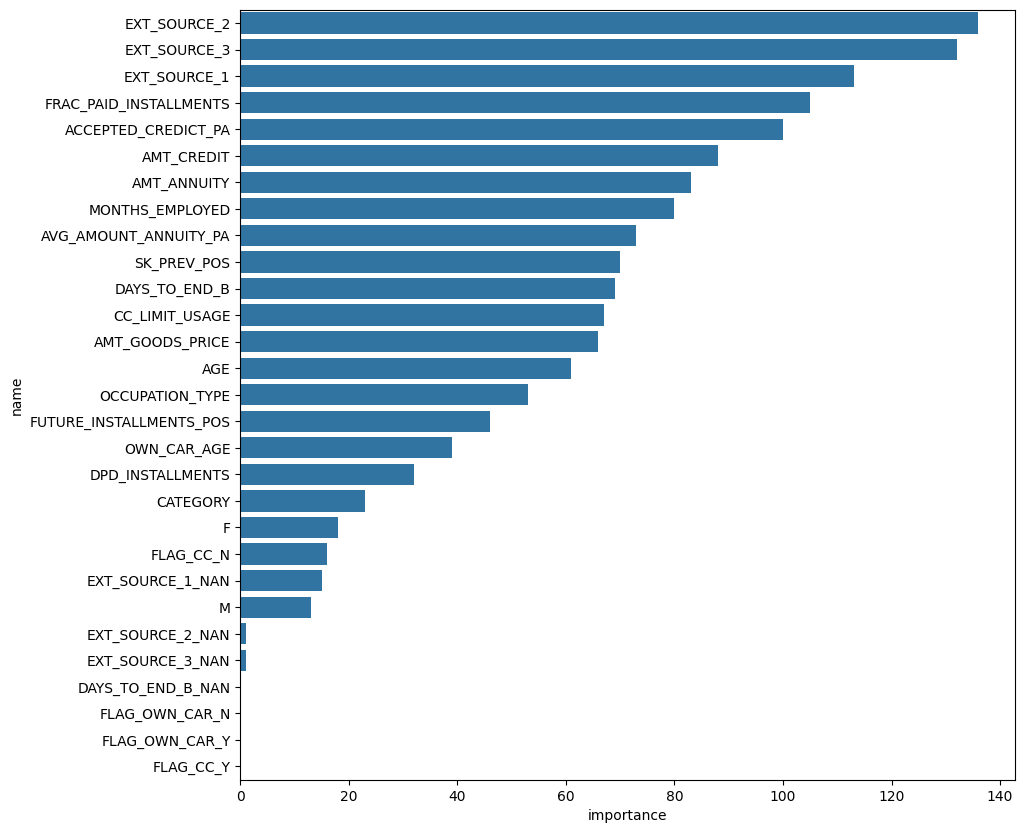

In [167]:
plt.figure(figsize=(10,10))
df_features = pd.DataFrame({'importance': lgb.feature_importances_, 'name': lgb.feature_name_})
df_features = df_features.sort_values(by='importance', ascending=False)

sns.barplot(data=df_features, x='importance', y='name')

## .0 CROSS-VALIDATION

In [277]:
from sklearn.model_selection import StratifiedKFold

In [278]:
# Lista de métricas a serem validadas
metrics = ['roc_auc','recall','precision']

# Model validation using k-fold cross-validation
for metric in metrics:
    scores = cross_val_score(lgb, X_train, y_train, cv=StratifiedKFold(n_splits = 5), scoring=metric)
    print(f'{metric} Médio: {scores.mean():.4f}, Desvio Padrão: {scores.std():.4f}')

roc_auc Médio: 0.7407, Desvio Padrão: 0.0051
recall Médio: 0.4221, Desvio Padrão: 0.0106
precision Médio: 0.4905, Desvio Padrão: 0.0078


In [ ]:
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}
grid = GridSearchCV(estimator=lgb, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)
grid_result = grid.fit(X_train, y_train)
# Resultados
print("Melhor: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))

<Axes: xlabel='importance', ylabel='name'>

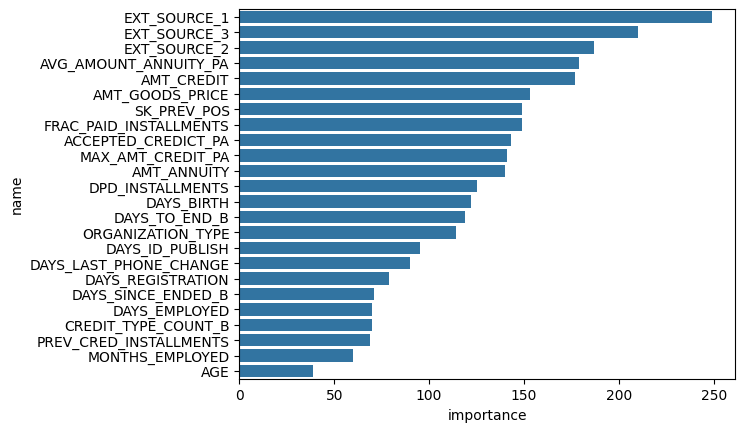

In [246]:
df_features = pd.DataFrame({'importance': lgb.feature_importances_, 'name': lgb.feature_name_})
df_features = df_features.sort_values(by='importance', ascending=False)

sns.barplot(data=df_features, x='importance', y='name')